# Exercise 03 - Autoregressive Integrated Moving Average Models

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 03.1 - Plot the ACF and PACF of the 4 series in data_arma.csv
### Try to say to which AR or MA process each series belong

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
df = pd.read_csv('data_arma.csv', skiprows=0)
df.head()

,Unnamed: 0,ts1,ts2,ts3,ts4
0,0,0.533570,-0.126804,-0.802837,1.812825
1,1,1.240130,1.314360,-0.595602,0.042764
2,2,1.618598,1.405994,0.127180,-1.759427
3,3,1.140465,3.132621,0.958586,-0.456798
4,4,0.481561,3.179083,0.164598,-1.254790


In [20]:
df.set_index('Unnamed: 0', inplace=True)

In [21]:
df.head()

,ts1,ts2,ts3,ts4
Unnamed: 0,,,,
0,0.533570,-0.126804,-0.802837,1.812825
1,1.240130,1.314360,-0.595602,0.042764
2,1.618598,1.405994,0.127180,-1.759427
3,1.140465,3.132621,0.958586,-0.456798
4,0.481561,3.179083,0.164598,-1.254790


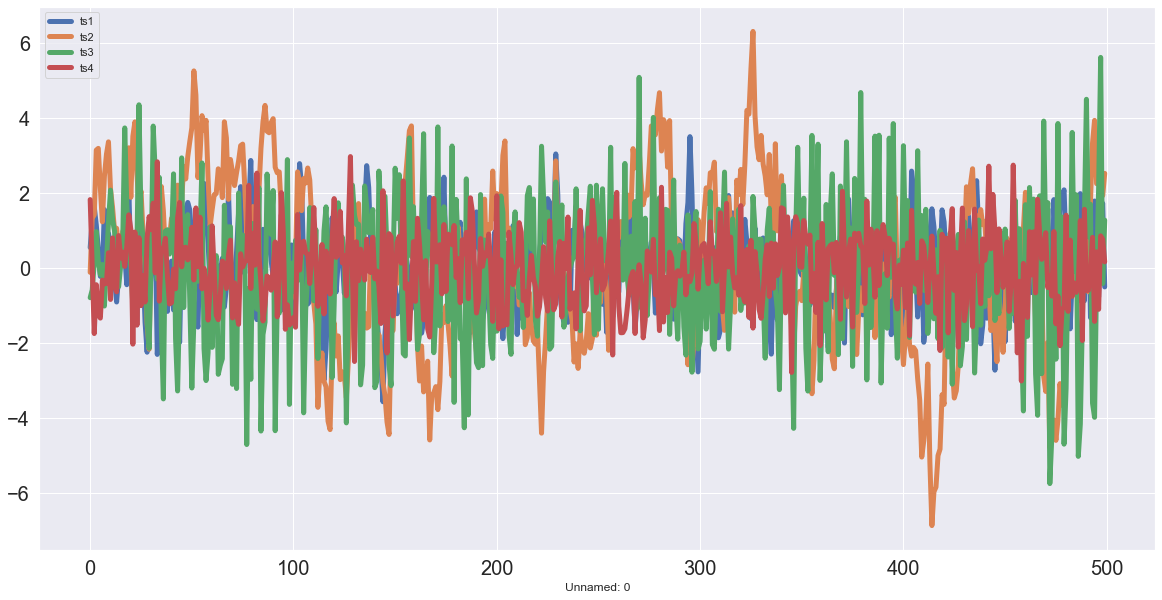

In [23]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20);

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

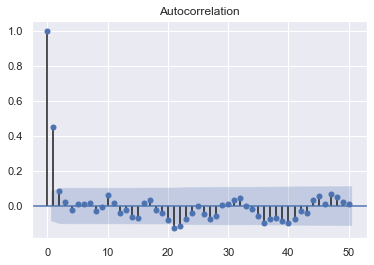

In [29]:
plot_acf(df["ts1"], lags=50);

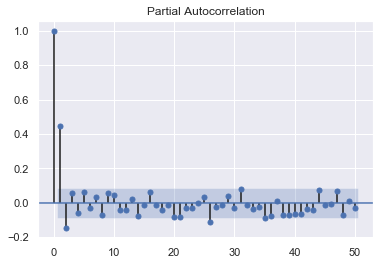

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["ts1"], lags=50);

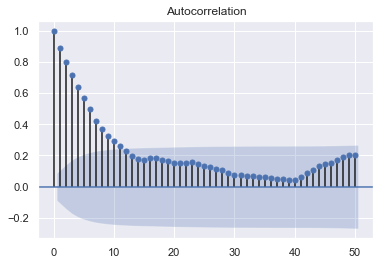

In [30]:
plot_acf(df["ts2"], lags=50);

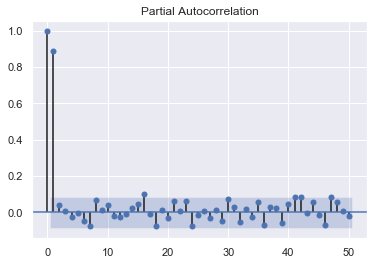

In [34]:
plot_pacf(df["ts2"], lags=50);

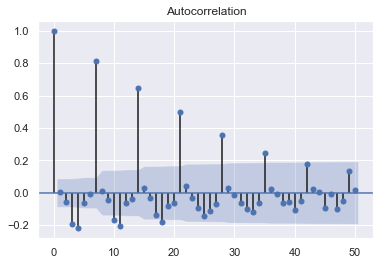

In [31]:
plot_acf(df["ts3"], lags=50);

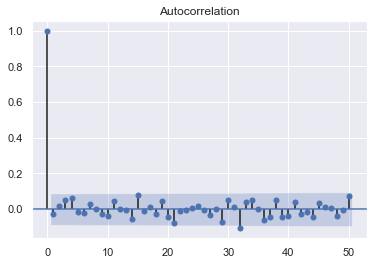

In [32]:
plot_acf(df["ts4"], lags=50);

# 03.2 - Using the shampoo dataset:
## Find the parameters p, d q that minimizes the rmse of the rolling forecast


C:\Users\Fabian Rodriguez\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


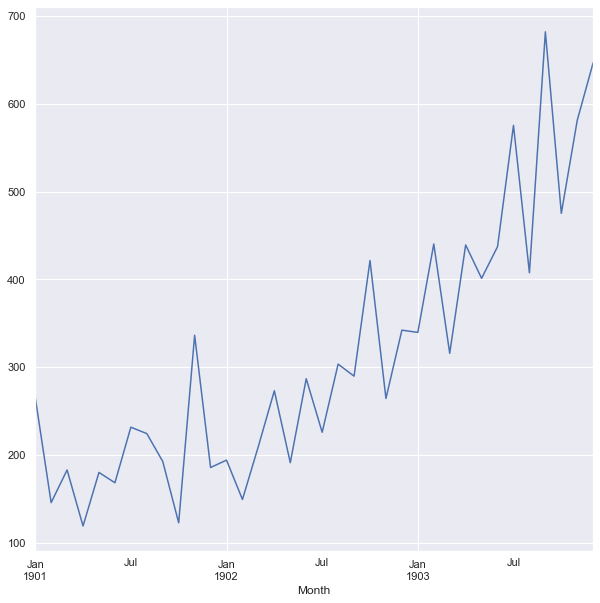

In [35]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot(figsize=(10, 10));

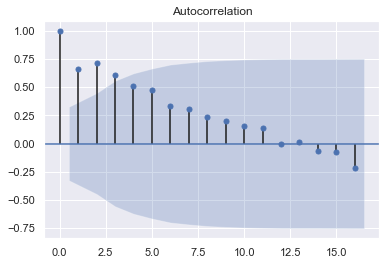

In [36]:
plot_acf(series);

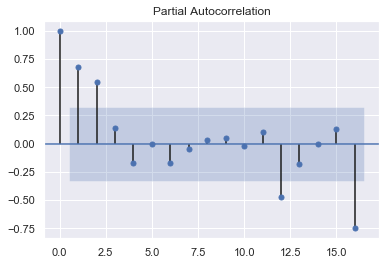

In [37]:
plot_pacf(series);

In [38]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Fabian Rodriguez\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Fabian Rodriguez\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Thu, 18 Jun 2020   AIC                            406.340
Time:                        18:45:14   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

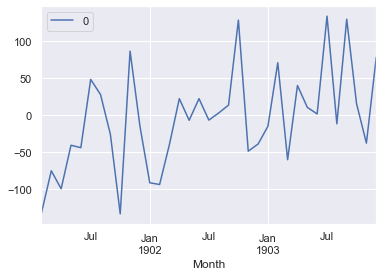

In [39]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

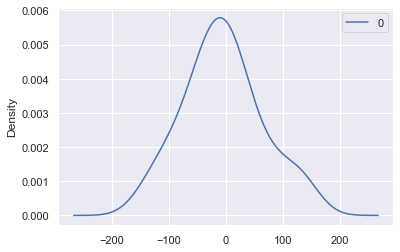

                0
count   35.000000
mean    -5.495216
std     68.132882
min   -133.296656
25%    -42.477819
50%     -7.186509
75%     24.748311
max    133.237940


In [40]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [41]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=349.117692, expected=342.300000
predicted=306.512866, expected=339.700000
predicted=387.376465, expected=440.400000
predicted=348.154144, expected=315.900000
predicted=386.308801, expected=439.300000
predicted=356.082088, expected=401.300000
predicted=446.379471, expected=437.400000
predicted=394.737288, expected=575.500000
predicted=434.915413, expected=407.600000
predicted=507.923472, expected=682.000000
predicted=435.482761, expected=475.300000
predicted=652.743901, expected=581.300000
predicted=546.343472, expected=646.900000
